#                             CLUSTERING

The task of grouping data points based on their similarity with each other is called clustering or cluster analysis. this method is defined under the branch of Unsupervised Learning

Importing Basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the Dataset

In [2]:
data=pd.read_csv("income.csv.xls")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Summarize Dataset

In [3]:
print(data.shape)

(200, 5)


Describing the Dataset

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Segregate and Zipping the Dataset

In [5]:
income=data['Annual Income (k$)'].values
spend=data['Spending Score'].values
X=np.array(list(zip(income,spend)))

In [6]:
X      # It display the income and spend together

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Finding the optimized K value

C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a m

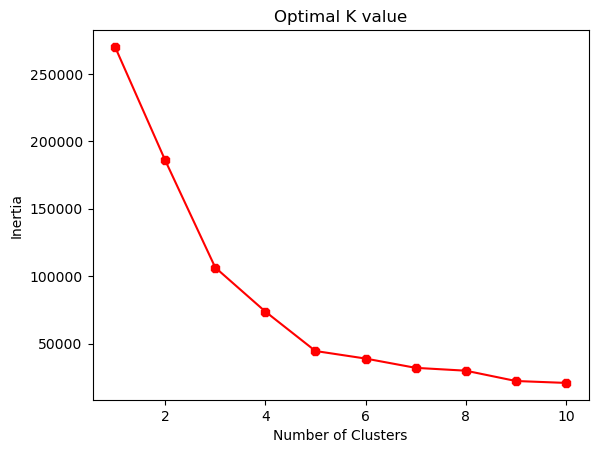

In [10]:
from sklearn.cluster import KMeans
#Within a cluster sum of square

wcs=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(X)
    wcs.append(km.inertia_)
plt.plot(range(1,11),wcs,color='red', marker='8')
plt.title('Optimal K value')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Visualizing the Clusters for k=4

 Cluster 1: Customers with medium income and low spend
 
 Cluster 2: Customer with high income and medium to high spend
 
 Cluster 3: Customer with low income and medium spend
 
 Cluster 4: Customers with medium income but high spend

In [12]:
model=KMeans(n_clusters=4,random_state=0)
y_means=model.fit_predict(X)

C:\Users\SASI REKHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#   Going to use scatter plot

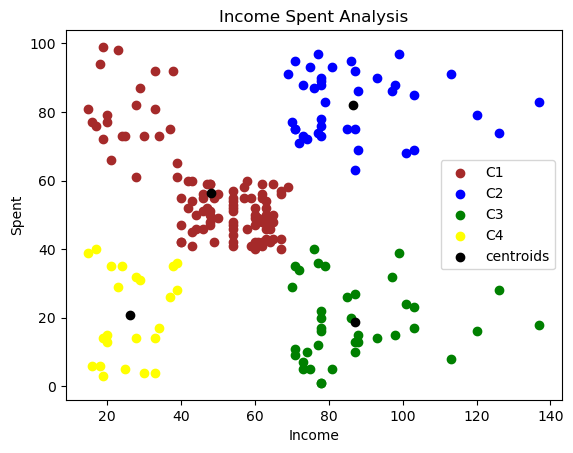

In [15]:
plt.scatter(X[y_means == 0,0],X[y_means==0,1],c='brown', label='C1')
plt.scatter(X[y_means == 1,0],X[y_means==1,1],c='blue',label='C2')
plt.scatter(X[y_means == 2,0],X[y_means==2,1],c='green',label='C3')
plt.scatter(X[y_means == 3,0],X[y_means==3,1],c='yellow',label='C4')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='o', label='centroids',c='k')
plt.title('Income Spent Analysis')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.show()

Prediction for all  Test Data

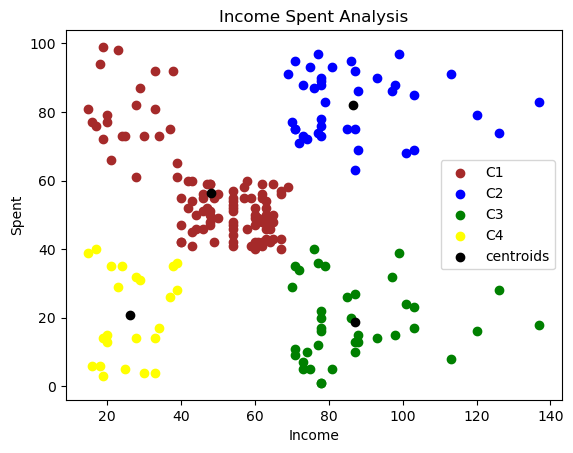

In [16]:
plt.scatter(X[y_means == 0,0],X[y_means==0,1],c='brown', label='C1')
plt.scatter(X[y_means == 1,0],X[y_means==1,1],c='blue',label='C2')
plt.scatter(X[y_means == 2,0],X[y_means==2,1],c='green',label='C3')
plt.scatter(X[y_means == 3,0],X[y_means==3,1],c='yellow',label='C4')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='o', label='centroids',c='k')
plt.title('Income Spent Analysis')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.show()